In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./logs/wandb_export_2024-04-11T11 00 59.592-06 00.csv", index_col="Step")

In [4]:
df.columns

Index(['1 layer batch 1024 - loss', '1 layer batch 1024 - loss__MIN',
       '1 layer batch 1024 - loss__MAX', '2 layers batch_size 1024 - loss',
       '2 layers batch_size 1024 - loss__MIN',
       '2 layers batch_size 1024 - loss__MAX',
       '8 layers batch_size 1024 - loss',
       '8 layers batch_size 1024 - loss__MIN',
       '8 layers batch_size 1024 - loss__MAX',
       '4 layers batch_size 1024 - loss',
       '4 layers batch_size 1024 - loss__MIN',
       '4 layers batch_size 1024 - loss__MAX'],
      dtype='object')

In [5]:
!mkdir plots

mkdir: cannot create directory ‘plots’: File exists


# RWKV

In [6]:
def smoothed_df(df):
    df = df.copy()
    window_size = 10  # Adjust the window size as needed
    df['1 layer batch_size 1024 - loss_smooth'] = df['1 layer batch 1024 - loss'].rolling(window=window_size).mean()
    df['2 layers batch_size 1024 - loss_smooth'] = df['2 layers batch_size 1024 - loss'].rolling(window=window_size).mean()
    df['4 layers batch_size 1024 - loss_smooth'] = df['4 layers batch_size 1024 - loss'].rolling(window=window_size).mean()
    df['8 layers batch_size 1024 - loss_smooth'] = df['8 layers batch_size 1024 - loss'].rolling(window=window_size).mean()
    return df


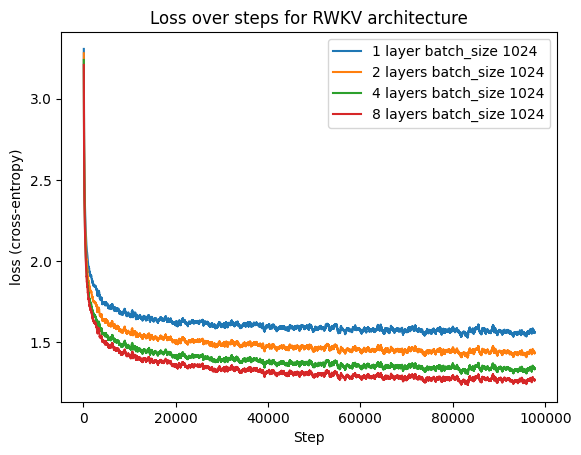

In [7]:
window_size = 150
df['1 layer batch_size 1024 - loss_smooth'] = df['1 layer batch 1024 - loss'].rolling(window=window_size).mean()
df['2 layers batch_size 1024 - loss_smooth'] = df['2 layers batch_size 1024 - loss'].rolling(window=window_size).mean()
df['4 layers batch_size 1024 - loss_smooth'] = df['4 layers batch_size 1024 - loss'].rolling(window=window_size).mean()
df['8 layers batch_size 1024 - loss_smooth'] = df['8 layers batch_size 1024 - loss'].rolling(window=window_size).mean()

sns.lineplot(data=df['1 layer batch_size 1024 - loss_smooth'], label='1 layer batch_size 1024')
sns.lineplot(data=df['2 layers batch_size 1024 - loss_smooth'], label='2 layers batch_size 1024')
sns.lineplot(data=df['4 layers batch_size 1024 - loss_smooth'], label='4 layers batch_size 1024')
sns.lineplot(data=df['8 layers batch_size 1024 - loss_smooth'], label='8 layers batch_size 1024')

plt.ylabel("loss (cross-entropy)")
plt.title("Loss over steps for RWKV architecture")
# Display the plot
plt.savefig('plots/Loss_RWKV.png', dpi=300, bbox_inches='tight')
plt.show()

## Number of heads

In [8]:
df = pd.read_csv("./logs/n_heads.csv", index_col="Step")

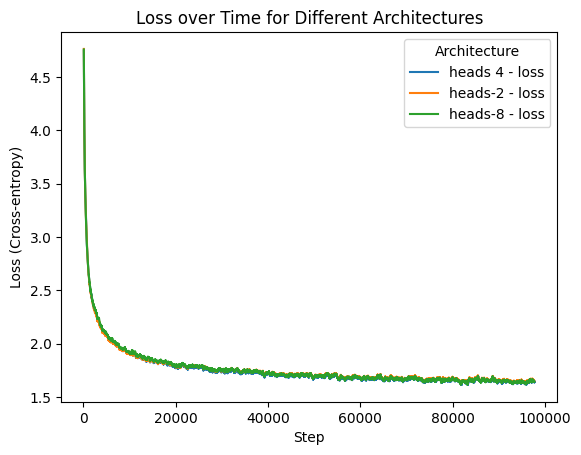

In [9]:
window_size = 150

# Calculate rolling averages for each loss column
df['heads 4 - loss_smooth'] = df['heads 4 - loss'].rolling(window=window_size).mean()
df['heads-2 - loss_smooth'] = df['heads-2 - loss'].rolling(window=window_size).mean()
df['heads-8 - loss_smooth'] = df['heads-8 - loss'].rolling(window=window_size).mean()

# Plotting the smoothed loss over time
sns.lineplot(data=df['heads 4 - loss_smooth'], label='heads 4 - loss')
sns.lineplot(data=df['heads-2 - loss_smooth'], label='heads-2 - loss')
sns.lineplot(data=df['heads-8 - loss_smooth'], label='heads-8 - loss')

# Customize plot labels and title
plt.ylabel("Loss (Cross-entropy)")
plt.title("Loss over Time for Different Architectures")
plt.legend(title='Architecture')

# Save or display the plot
plt.savefig('plots/Loss_heads.png', dpi=300, bbox_inches='tight')
plt.show()

# Mamba

In [10]:
df = pd.read_csv("./logs/mamba_runs.csv", index_col="Step")

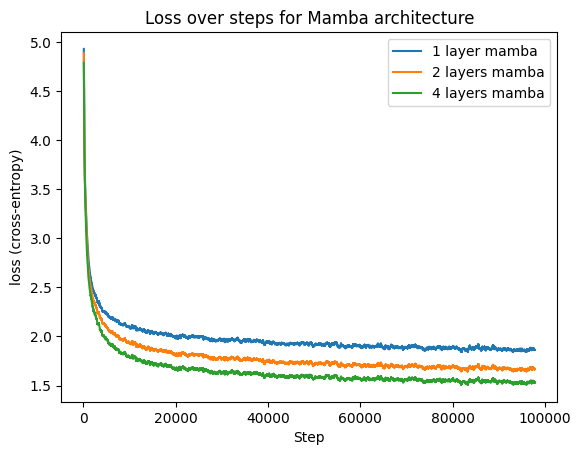

In [12]:
window_size = 150

df['1-layer-mamba - loss_smooth'] = df['1-layer-mamba - loss'].rolling(window=window_size).mean()
df['2-layer-mamba - loss_smooth'] = df['2-layer-mamba - loss'].rolling(window=window_size).mean()
df['4-layer-mamba - loss_smooth'] = df['4-layer-mamba - loss'].rolling(window=window_size).mean()

sns.lineplot(data=df['1-layer-mamba - loss_smooth'], label='1 layer mamba')
sns.lineplot(data=df['2-layer-mamba - loss_smooth'], label='2 layers mamba')
sns.lineplot(data=df['4-layer-mamba - loss_smooth'], label='4 layers mamba')

plt.ylabel("loss (cross-entropy)")
plt.title("Loss over steps for Mamba architecture")

# Display the plot
plt.savefig('plots/Loss_Mamba.png', dpi=300, bbox_inches='tight')
plt.show()

# Pretty plots

In [18]:
df = pd.read_csv("./logs/compression_ratios.csv")

In [19]:
df

,n_layers,architecture,ratio,file_size,n_params
0,1,RWKV,3.43,29120871,69136
1,2,RWKV,3.71,26958823,119712
2,4,RWKV,3.97,25215016,220864
3,8,RWKV,4.15,24114950,423168
4,1,MAMBA,2.80,35662204,49152
5,2,MAMBA,3.09,32343869,81856
6,4,MAMBA,3.35,29868779,147264


In [20]:
df.dtypes

n_layers          int64
architecture     object
ratio           float64
file_size         int64
n_params          int64
dtype: object

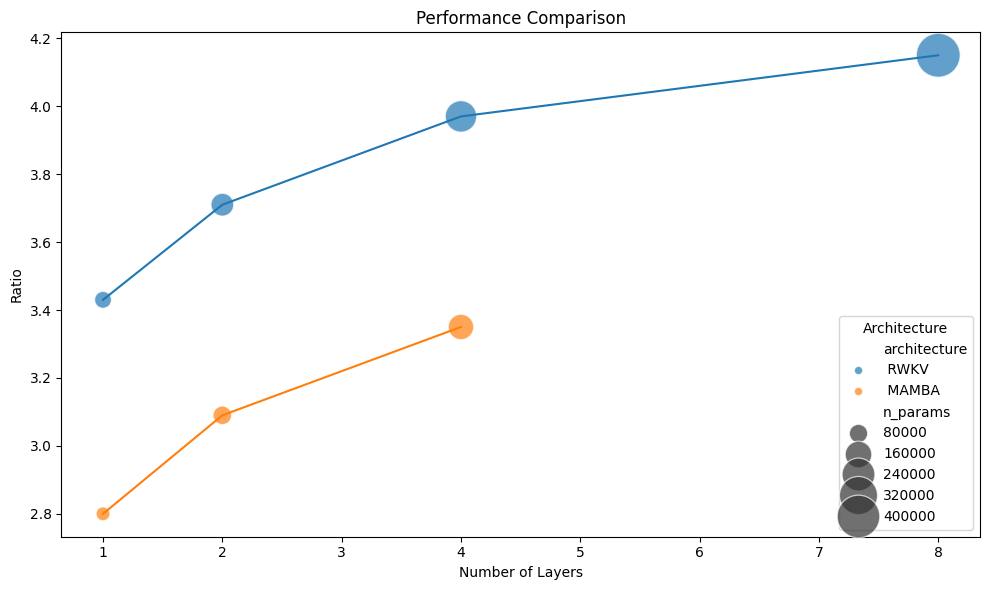

In [45]:
plt.figure(figsize=(10, 6))

# Create the scatter plot
scatter = sns.scatterplot(data=df, x='n_layers', y='ratio', size='n_params', hue='architecture', sizes=(100, 1000), alpha=0.7)

# Create the line plot without adding it to the legend
sns.lineplot(data=df, x='n_layers', y='ratio', hue='architecture', legend=False)

# Get the legend handles and labels from the scatter plot
handles, labels = scatter.get_legend_handles_labels()

# Create a new legend with only the scatter plot handles and labels
plt.legend(handles, labels, title='Architecture')

plt.title('Performance Comparison')
plt.xlabel('Number of Layers')
plt.ylabel('Ratio')
plt.tight_layout()
plt.savefig('plots/performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()